<a href="https://colab.research.google.com/github/thain4nilo/KNN-Regressor-Song-Popularity/blob/main/KNNRegressor_SongPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal de Pernambuco**

*MBA - Business Intelligence & Analytics*

**Disciplina:** Mineração de Dados

**Docente:** Paulo Salgado

Grupo:
- Andrea Cristina Bezerra
- Renata Modesto da Silva
- Thainá Oliveira Nilo de Souza

# Tarefa 2 - Regressão

**DataSet:** Song Popularity

*Fonte:* https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# leitura da base
df_raw = pd.read_csv("song_data.csv")

print(df_raw.shape)
df_raw.head()

(18835, 15)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df_raw.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

## Análise Exploratória

In [ ]:
# verificar tipo e contagem de não nulos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


Não há nulos e apenas o nome da música é uma string, o restante é valor contínuo ou inteiro.

In [ ]:
# Retirar a variável de song_name
df = df_raw.select_dtypes(include='number')
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18835.0,52.991877,21.905654,0.000000,40.0000,56.000000,69.00000,100.000
song_duration_ms,18835.0,218211.587576,59887.540566,12000.000000,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18835.0,0.258539,0.288719,0.000001,0.0241,0.132000,0.42400,0.996
danceability,18835.0,0.633348,0.156723,0.000000,0.5330,0.645000,0.74800,0.987
energy,18835.0,0.644995,0.214101,0.001070,0.5100,0.674000,0.81500,0.999
instrumentalness,18835.0,0.078008,0.221591,0.000000,0.0000,0.000011,0.00257,0.997
key,18835.0,5.289196,3.614595,0.000000,2.0000,5.000000,8.00000,11.000
liveness,18835.0,0.179650,0.143984,0.010900,0.0929,0.122000,0.22100,0.986
loudness,18835.0,-7.447435,3.827831,-38.768000,-9.0440,-6.555000,-4.90800,1.585
audio_mode,18835.0,0.628139,0.483314,0.000000,0.0000,1.000000,1.00000,1.000


As variáveis tem grandezas bastante distintas, será interessante realizar uma padronização.

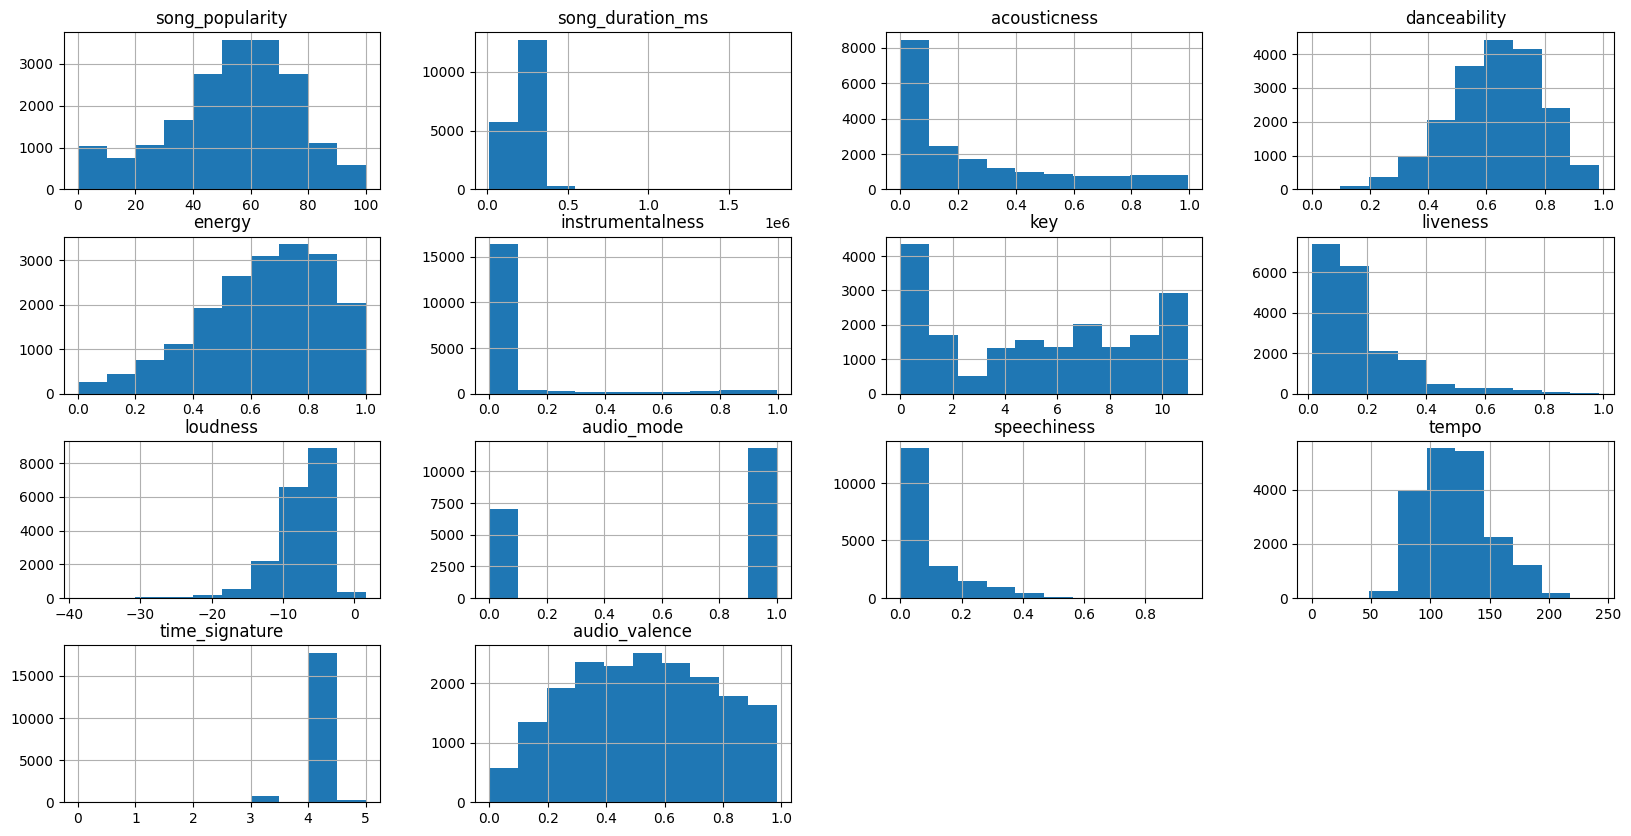

In [ ]:
histograma = df.hist(figsize=(20,10))

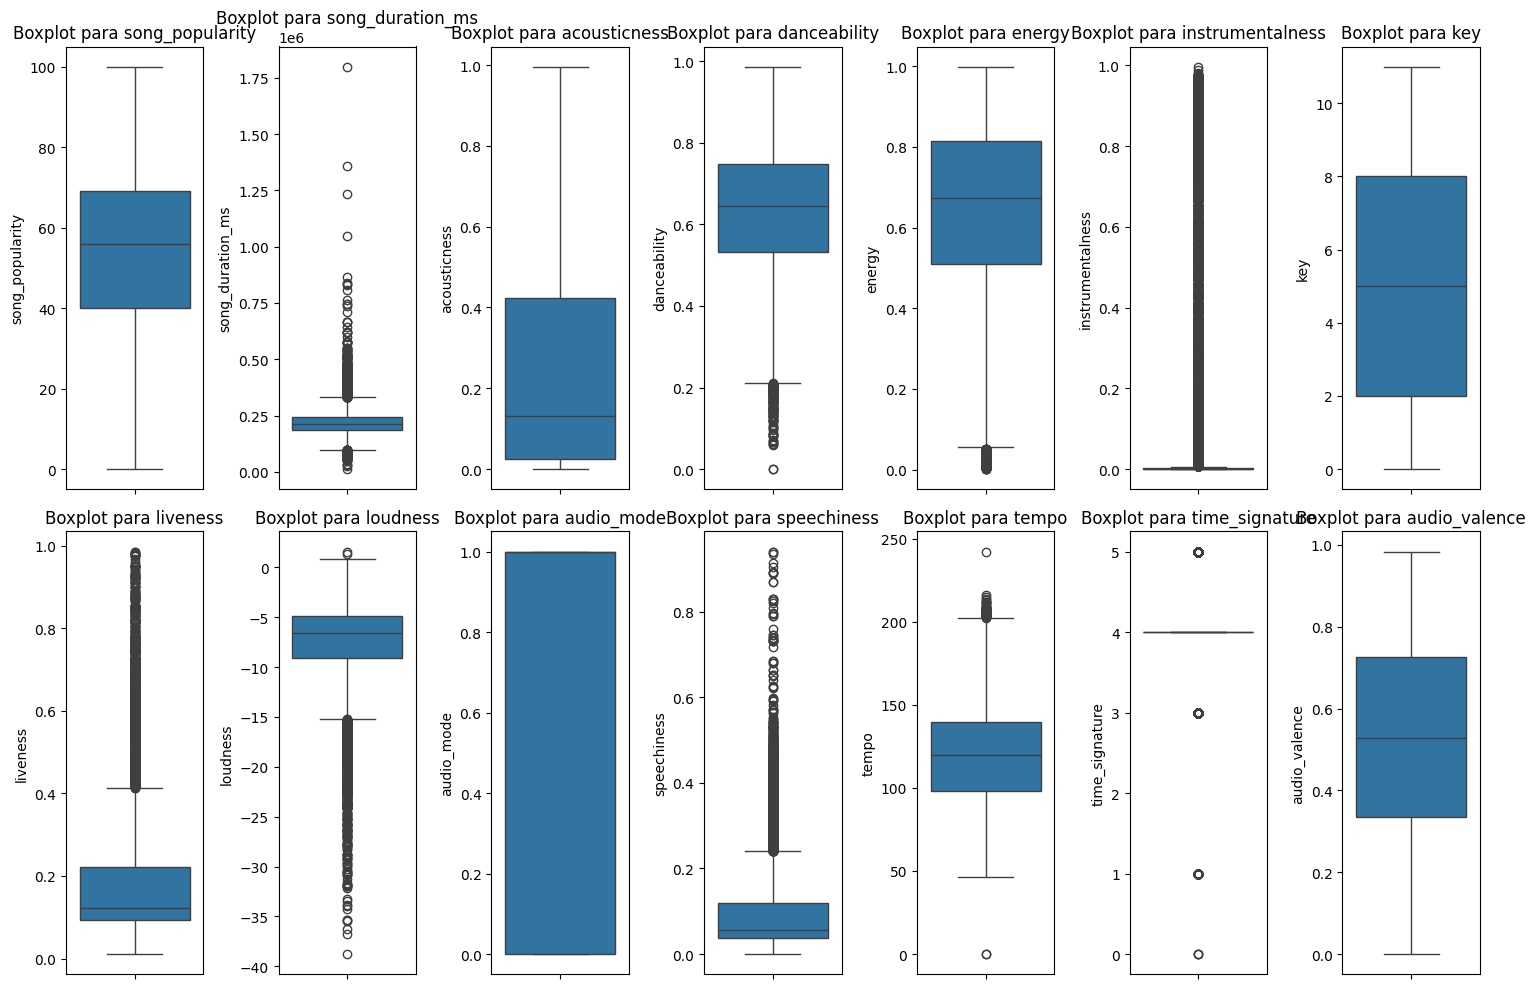

In [ ]:
# Boxplot para visualização de outliers

# Criar a figura e os eixos do grid
fig, axes = plt.subplots(2, 7, figsize=(15, 2*5))
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar a iteração

# Plotar cada boxplot no grid
for i, column in enumerate(df):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot para {column}')

# Remover eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Há outliers significativos em:
- song_duration_ms,
- loudness,
- danceability
- speechiness
- tempo

Entenda significativo como: outliers que descolam dos próprios outliers.

In [ ]:
# verificando variáveis categóricas
display(df['audio_mode'].value_counts())
display(df['key'].value_counts())
display(df['time_signature'].value_counts())

audio_mode
1    11831
0     7004
Name: count, dtype: int64

key
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: count, dtype: int64

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

## Pré-processamento

### Eliminar duplicatas

In [ ]:
# Eliminar linhas duplicadas
print("Tamanho original: ",df_raw.shape[0])
df.drop_duplicates(inplace=True)
print("Tamanho após drop de linhas duplicadas: ",df.shape[0])

Tamanho original:  18835
Tamanho após drop de linhas duplicadas:  14924


### Eliminar Outliers

Para realizar o ajuste de **outliers**, será eliminado apenas os mais significativos das feautures verificadas anteriormente como mais problemáticas, dada sua distribuição.
- song_duration_ms,
- loudness,
- danceability
- speechiness
- tempo


A estratégia utilizada para retirar apenas os mais significativos foi encontrar os outliers dos outliers, desta forma não será necessário perder tantas linhas de dados e melhorar a qualidade do dataset.



#### Song duration ms

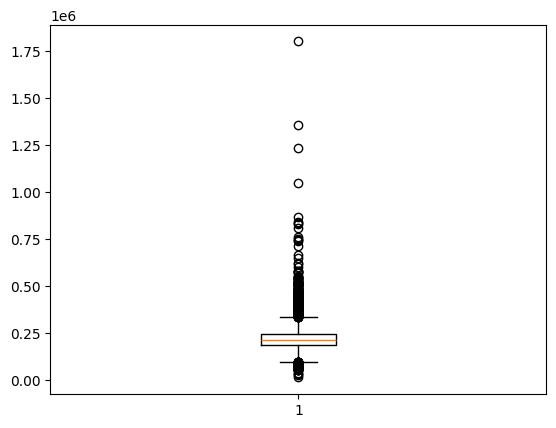

In [ ]:
plt.boxplot(df['song_duration_ms'])
plt.show()

In [ ]:
q1 = df['song_duration_ms'].quantile(0.25)
q3 = df['song_duration_ms'].quantile(0.75)
iqr = q3-q1

limite_inferior_songduration = q1 - 1.5 * iqr
limite_superior_songduration = q1 + 1.5 * iqr

print(q1,q3,iqr,limite_inferior_songduration, limite_superior_songduration)

print("\n\nSUPERIOR")
outliers_songduration_sup = df[(df['song_duration_ms']>limite_superior_songduration)] # o foco será eliminar os outliers superiores
display(outliers_songduration_sup)

print("\nINFERIOR")
outliers_songduration_inf = df[(df['song_duration_ms']<limite_inferior_songduration)] # o foco será eliminar os outliers inferiores
display(outliers_songduration_inf)

183937.25 244721.5 60784.25 92760.875 275113.625


SUPERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
24,77,304840,0.000202,0.602,0.9050,0.064000,2,0.1170,-4.046,1,0.0775,128.019,4,0.4110
26,28,303920,0.010200,0.440,0.9320,0.000000,3,0.1420,-4.488,0,0.0584,157.438,4,0.4950
28,77,311106,0.000289,0.217,0.9050,0.000110,2,0.2220,-4.103,1,0.0752,96.950,4,0.2360
31,77,293960,0.007970,0.614,0.5680,0.000000,7,0.0997,-5.477,0,0.0276,107.849,4,0.5160
41,60,282946,0.041700,0.545,0.7530,0.000000,3,0.3890,-4.618,0,0.0360,105.754,4,0.4340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18779,64,285866,0.946000,0.394,0.0826,0.002970,7,0.1540,-12.172,1,0.0392,131.512,4,0.0932
18780,66,305000,0.770000,0.509,0.4170,0.094600,10,0.0887,-9.632,1,0.0295,134.956,4,0.4820
18794,63,278958,0.261000,0.541,0.6190,0.000012,4,0.1120,-7.247,0,0.0299,87.828,4,0.3810
18803,46,281865,0.987000,0.516,0.1500,0.084300,3,0.1130,-19.033,1,0.0405,158.964,4,0.4730



INFERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1757,55,63080,0.822,0.519,0.360,0.000000,10,0.1770,-8.575,0,0.1050,97.420,4,0.7000
1768,51,90653,0.794,0.543,0.556,0.000000,6,0.1680,-5.379,0,0.1400,100.998,4,0.7360
1776,55,76946,0.554,0.927,0.329,0.000029,7,0.0302,-13.676,1,0.1560,129.998,4,0.7910
1800,24,75360,0.373,0.539,0.685,0.000000,0,0.0809,-5.157,0,0.0461,123.955,4,0.5380
1808,26,72786,0.295,0.781,0.427,0.000000,1,0.2370,-8.373,0,0.0468,127.892,4,0.7640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17620,26,55720,0.975,0.289,0.451,0.942000,2,0.2220,-15.013,1,0.0538,131.720,3,0.5900
18056,34,57732,0.627,0.433,0.897,0.866000,0,0.2510,-10.479,0,0.0429,105.002,4,0.7980
18060,37,26186,0.196,0.365,0.275,0.960000,9,0.0650,-13.654,1,0.0738,84.388,4,0.0846
18064,33,65533,0.314,0.553,0.833,0.576000,11,0.2370,-9.427,0,0.0812,99.928,1,0.0366


Neste caso, como o limite inferior determinou apenas 107 linhas de outlier, podemos eliminá-las sem grandes perdas ao df (menos de 1%)

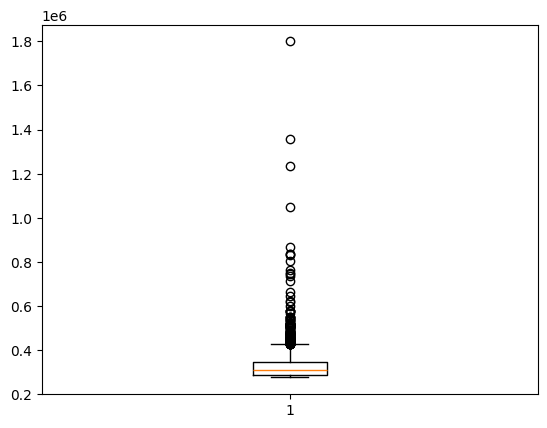

,index,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,219,60,443480,0.77900,0.582,0.610,0.000007,11,0.2670,-6.641,0,0.1030,93.658,4,0.8260
1,231,43,378373,0.11200,0.559,0.730,0.002670,10,0.2630,-8.461,0,0.0639,106.806,4,0.7780
2,233,59,408440,0.44500,0.301,0.335,0.001810,0,0.7510,-8.564,1,0.0303,176.591,4,0.3860
3,236,58,622520,0.42200,0.489,0.679,0.000007,7,0.1300,-4.899,0,0.0326,95.813,4,0.6580
4,254,77,425653,0.01120,0.386,0.607,0.000014,10,0.0880,-7.700,1,0.0261,147.207,4,0.5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,18147,23,1799346,0.46800,0.737,0.849,0.001870,0,0.0862,-5.587,0,0.0688,98.162,4,0.6860
299,18148,18,615906,0.15700,0.834,0.803,0.003810,5,0.1670,-5.551,0,0.2050,101.368,4,0.8250
300,18200,40,379795,0.04430,0.807,0.872,0.375000,1,0.2080,-6.412,0,0.0728,121.995,4,0.2970
301,18606,55,466560,0.00501,0.415,0.456,0.763000,9,0.1780,-12.082,1,0.0352,151.937,4,0.0935


In [ ]:
# Outliers dos outliers - SUPERIOR
q1 = outliers_songduration_sup['song_duration_ms'].quantile(0.25)
q3 = outliers_songduration_sup['song_duration_ms'].quantile(0.75)
iqr = q3-q1

limite_superior_songduration_recal = q1 + 1.5 * iqr

plt.boxplot(outliers_songduration_sup['song_duration_ms'])
plt.show()

outliers_songduration2 = outliers_songduration_sup[(outliers_songduration_sup['song_duration_ms']> limite_superior_songduration_recal)] #neste caso vamos focar apenas nos outliers superiores
outliers_songduration2.reset_index()

{'whiskers': [<matplotlib.lines.Line2D at 0x23f26765910>,
 'caps': [<matplotlib.lines.Line2D at 0x23f26766910>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f26764f10>],
 'medians': [<matplotlib.lines.Line2D at 0x23f26767a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f26770250>],
 'means': []}

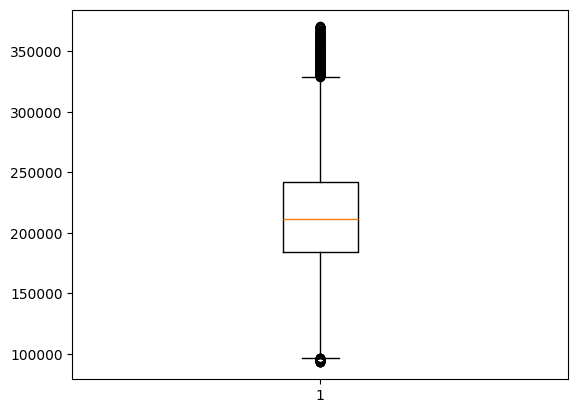

In [ ]:
# filtrar df original com o limite superior recalculado e o limite inferior inicial
df_new1 = df[(df['song_duration_ms']<limite_superior_songduration_recal) & (df['song_duration_ms']>limite_inferior_songduration)]
plt.boxplot(df_new1['song_duration_ms'])

#### Loudness

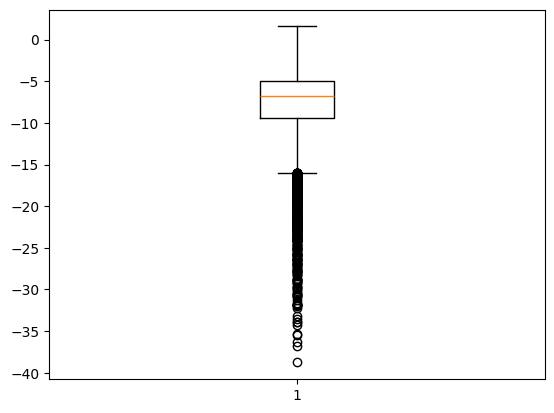

In [ ]:
plt.boxplot(df['loudness'])
plt.show()

In [ ]:
q1 = df['loudness'].quantile(0.25)
q3 = df['loudness'].quantile(0.75)
iqr = q3-q1

limite_inferior_loudness = q1 - 1.5 * iqr
limite_superior_loudness = q1 + 1.5 * iqr

print(q1,q3,iqr,limite_inferior_loudness, limite_superior_loudness)

print("\n\nINFERIOR")
outliers_loudness = df[(df['loudness'] < limite_inferior_loudness)] #neste caso vamos focar apenas nos outliers inferiores
display(outliers_loudness)

-9.39 -4.9910000000000005 4.399 -15.9885 -2.791500000000001


INFERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
221,52,162213,0.3370,0.816,0.4160,0.791000,5,0.0452,-17.795,0,0.2440,90.148,4,0.8170
232,58,351400,0.6520,0.555,0.3310,0.000012,9,0.2350,-17.718,0,0.2700,170.603,3,0.4370
239,50,325506,0.8880,0.660,0.1240,0.000764,5,0.1110,-19.200,0,0.0496,129.919,4,0.3620
244,52,278040,0.8110,0.649,0.1440,0.000002,0,0.0890,-16.809,1,0.0522,119.193,4,0.2640
314,49,710826,0.2850,0.351,0.2280,0.001160,0,0.1230,-17.271,1,0.0307,104.551,4,0.0329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18813,72,188800,0.9150,0.468,0.2010,0.000083,4,0.0952,-17.024,1,0.0388,94.422,4,0.3830
18818,62,175777,0.0128,0.214,0.1480,0.058000,7,0.1130,-17.775,1,0.0370,46.591,4,0.0277
18820,23,250850,0.9590,0.417,0.1020,0.000275,6,0.8910,-16.787,1,0.0368,130.994,4,0.0863
18825,60,145466,0.9060,0.491,0.0409,0.000015,0,0.0896,-18.431,1,0.0383,131.053,3,0.2780


,index,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,4130,72,110880,0.996,0.1240,0.09240,0.848,11,0.0935,-31.726,1,0.0412,205.999,5,0.1350
1,4170,63,128250,0.996,0.4230,0.00107,0.968,3,0.1120,-35.389,1,0.0626,62.528,4,0.6340
2,4171,58,160625,0.990,0.4240,0.00528,0.943,7,0.0746,-31.853,1,0.0453,82.394,4,0.1790
3,4837,35,152340,0.994,0.2720,0.00266,0.866,8,0.1030,-31.238,1,0.0424,72.151,4,0.0573
4,4839,60,154840,0.935,0.0833,0.00524,0.910,7,0.0818,-36.281,1,0.0457,70.329,4,0.0361
5,4842,59,176890,0.995,0.3800,0.00205,0.914,7,0.1120,-31.905,1,0.0492,66.528,4,0.1620
6,4858,48,255500,0.994,0.3040,0.00163,0.903,6,0.1400,-31.921,1,0.0444,68.815,3,0.0569
7,5912,69,138426,0.992,0.1960,0.00687,0.917,7,0.1060,-34.255,1,0.0442,72.125,4,0.0530
8,5920,52,127073,0.975,0.2810,0.01340,0.921,6,0.3760,-33.246,1,0.0371,68.548,3,0.0427
9,5929,49,207386,0.969,0.1870,0.02460,0.728,4,0.0889,-33.493,1,0.0335,70.635,4,0.0309


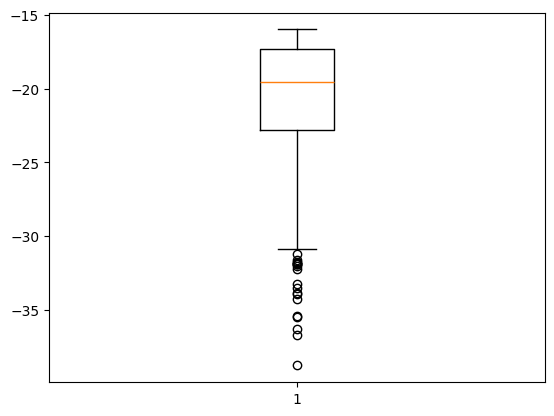

In [ ]:
# Outliers dos outliers - INFERIOR
q1 = outliers_loudness['loudness'].quantile(0.25)
q3 = outliers_loudness['loudness'].quantile(0.75)
iqr = q3-q1

limite_inferior_loudness_recal = q1 - 1.5 * iqr

plt.boxplot(outliers_loudness['loudness'])

outliers_loudness2 = outliers_loudness[(outliers_loudness['loudness'] < limite_inferior_loudness_recal)] #neste caso vamos focar apenas nos outliers inferiores
outliers_loudness2.reset_index()

{'whiskers': [<matplotlib.lines.Line2D at 0x23f26815d50>,
 'caps': [<matplotlib.lines.Line2D at 0x23f26817210>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f26815450>],
 'medians': [<matplotlib.lines.Line2D at 0x23f26930810>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f26931250>],
 'means': []}

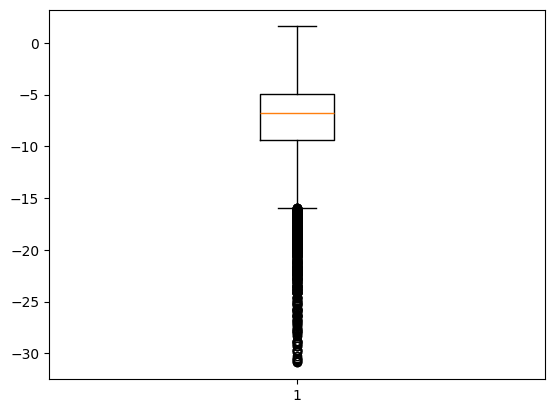

In [ ]:
df_new2 = df[(df['loudness'] > limite_inferior_loudness_recal)] #neste caso vamos focar apenas nos outliers inferiores
plt.boxplot(df_new2['loudness'])

#### Danceability

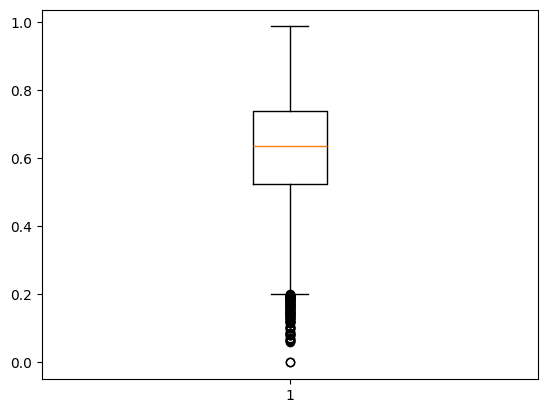

In [ ]:
plt.boxplot(df['danceability'])
plt.show()

In [ ]:
q1 = df['danceability'].quantile(0.25)
q3 = df['danceability'].quantile(0.75)
iqr = q3-q1

limite_inferior_danceability = q1 - 1.5 * iqr
limite_superior_danceability = q1 + 1.5 * iqr

print(q1,q3,iqr,limite_inferior_danceability, limite_superior_danceability)

print("\n\nINFERIOR")
outliers_danceability = df[(df['danceability'] < limite_inferior_danceability)] #neste caso vamos focar apenas nos outliers inferiores
display(outliers_danceability)

0.524 0.74 0.21599999999999997 0.20000000000000007 0.848


INFERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
301,66,269106,0.465000,0.195,0.483,0.497000,4,0.0686,-4.991,0,0.0300,84.710,4,0.1730
491,69,293120,0.822000,0.149,0.206,0.000649,3,0.1150,-13.888,1,0.0323,79.764,4,0.2640
1113,38,537506,0.016500,0.197,0.629,0.279000,11,0.1250,-9.291,1,0.0300,79.495,4,0.2210
2546,58,262106,0.000151,0.176,0.917,0.072800,6,0.2350,-4.884,0,0.0635,168.197,4,0.3250
2655,33,190346,0.034000,0.162,0.867,0.837000,2,0.5810,-6.778,1,0.0690,187.607,4,0.5720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16965,64,212523,0.918000,0.186,0.122,0.914000,7,0.1020,-19.870,0,0.0338,77.164,4,0.0349
17797,59,1355938,0.000308,0.197,0.837,0.752000,9,0.1020,-8.958,1,0.0626,186.443,4,0.1360
18039,53,178396,0.000050,0.143,0.820,0.283000,5,0.1840,-7.314,1,0.0529,155.044,4,0.5520
18069,32,147426,0.355000,0.143,0.356,0.918000,10,0.1710,-14.259,0,0.0345,170.217,4,0.1020


Neste caso não haverão grandes perdas ao retirar os outliers (menos de 1%)

{'whiskers': [<matplotlib.lines.Line2D at 0x23f26999e10>,
 'caps': [<matplotlib.lines.Line2D at 0x23f2699b350>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f26999150>],
 'medians': [<matplotlib.lines.Line2D at 0x23f269a4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f269a51d0>],
 'means': []}

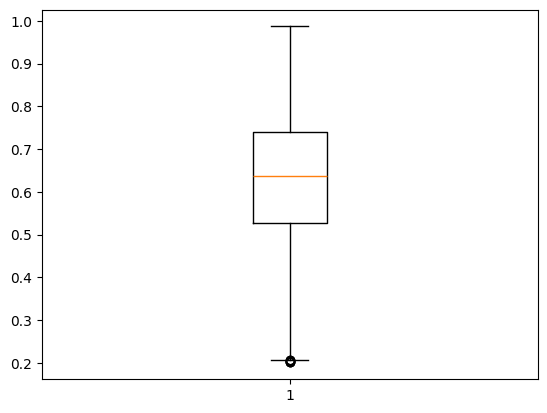

In [ ]:
df_new3 = df[(df['danceability'] > limite_inferior_danceability)] #neste caso vamos focar apenas nos outliers inferiores
plt.boxplot(df_new3['danceability'])

#### Speechiness

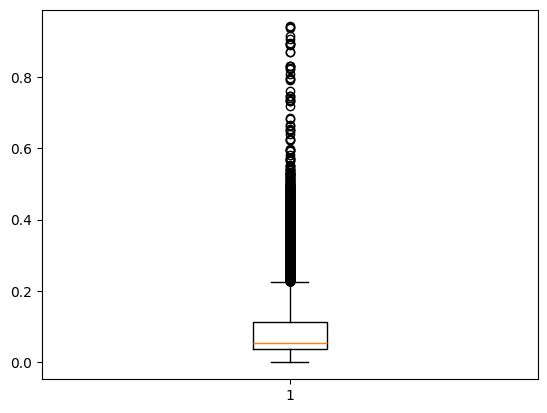

In [ ]:
plt.boxplot(df['speechiness'])
plt.show()

In [ ]:
q1 = df['speechiness'].quantile(0.25)
q3 = df['speechiness'].quantile(0.75)
iqr = q3-q1

limite_inferior_speechiness = q1 - 1.5 * iqr
limite_superior_speechiness = q1 + 1.5 * iqr

print(q1,q3,iqr,limite_inferior_speechiness, limite_superior_speechiness)

print("\n\nSUPERIOR")
outliers_speechiness = df[(df['speechiness'] > limite_superior_speechiness)] #neste caso vamos focar apenas nos outliers superiores
display(outliers_speechiness)

0.0372 0.113 0.0758 -0.07650000000000001 0.1509


SUPERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
34,74,213760,0.005060,0.599,0.932,0.000000,9,0.2690,-3.328,1,0.180,96.234,4,0.692
53,63,176306,0.000051,0.219,0.952,0.098900,2,0.1570,-3.621,1,0.176,112.886,1,0.172
61,98,212500,0.153000,0.841,0.798,0.000003,1,0.0618,-4.206,0,0.229,95.948,4,0.591
69,58,210865,0.716000,0.722,0.584,0.000321,11,0.1150,-8.467,0,0.318,169.978,4,0.646
71,83,215151,0.266000,0.817,0.740,0.000000,11,0.0992,-4.566,0,0.283,130.040,4,0.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18706,41,198972,0.130000,0.502,0.745,0.000027,8,0.3250,-8.614,0,0.426,159.966,4,0.656
18707,71,174666,0.134000,0.614,0.585,0.000129,10,0.0948,-9.483,1,0.164,169.905,4,0.211
18718,46,247616,0.010000,0.648,0.677,0.000046,1,0.1760,-6.288,1,0.185,105.002,4,0.340
18722,46,218538,0.133000,0.719,0.736,0.003940,5,0.2010,-6.569,1,0.156,119.004,4,0.612


In [ ]:
# Outliers dos outliers - SUPERIOR
q1 = outliers_speechiness['speechiness'].quantile(0.25)
q3 = outliers_speechiness['speechiness'].quantile(0.75)
iqr = q3-q1

limite_superior_speechiness_recal = q1 + 1.5 * iqr

outliers_speechiness2 = outliers_speechiness[(outliers_speechiness['speechiness'] > limite_superior_speechiness_recal)] #neste caso vamos focar apenas nos outliers superiores
outliers_speechiness2.reset_index()

,index,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,77,64,253714,0.0257,0.928,0.402,0.000000,8,0.0804,-7.569,0,0.451,139.998,4,0.620
1,253,77,333893,0.0484,0.412,0.902,0.131000,9,0.4050,-11.600,1,0.405,89.740,4,0.422
2,389,46,129106,0.5890,0.712,0.167,0.000000,1,0.1570,-22.047,0,0.891,96.637,4,0.376
3,845,51,302866,0.2030,0.500,0.899,0.000000,9,0.1770,-3.907,0,0.467,177.815,4,0.754
4,1258,96,179404,0.0880,0.931,0.387,0.000000,1,0.1360,-9.127,1,0.412,125.978,4,0.376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,18157,27,265440,0.2200,0.615,0.723,0.000000,0,0.0820,-4.808,1,0.404,97.998,4,0.941
344,18158,72,185000,0.0262,0.786,0.327,0.000013,2,0.1010,-9.889,1,0.528,158.019,4,0.194
345,18242,27,218053,0.2420,0.737,0.583,0.000000,4,0.4040,-7.558,0,0.438,91.999,4,0.392
346,18533,75,98734,0.2100,0.834,0.457,0.000000,10,0.0641,-10.775,1,0.572,158.008,4,0.533


{'whiskers': [<matplotlib.lines.Line2D at 0x23f26a03a50>,
 'caps': [<matplotlib.lines.Line2D at 0x23f26a14dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f26a030d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23f26a15fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f26a16850>],
 'means': []}

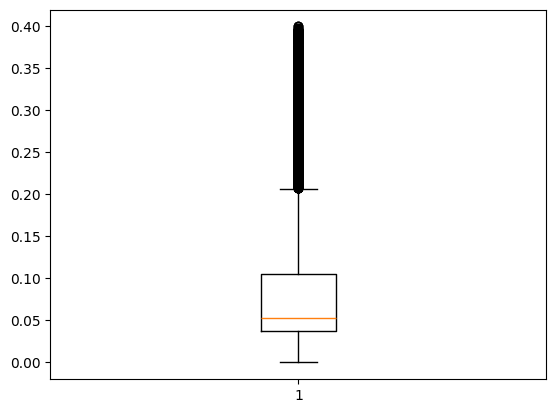

In [ ]:
df_new4 = df[(df['speechiness'] < limite_superior_speechiness_recal)] #neste caso vamos focar apenas nos outliers superiores
plt.boxplot(df_new4['speechiness'])

#### Tempo

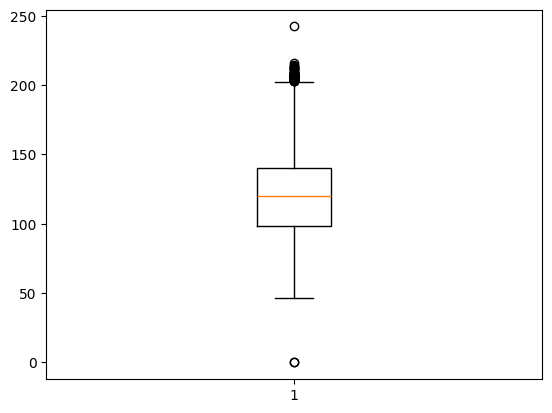

In [ ]:
plt.boxplot(df['tempo'])
plt.show()

In [ ]:
q1 = df['tempo'].quantile(0.25)
q3 = df['tempo'].quantile(0.75)
iqr = q3-q1

limite_inferior_tempo = q1 - 1.5 * iqr
limite_superior_tempo = q1 + 1.5 * iqr

print(q1,q3,iqr,limite_inferior_tempo, limite_superior_tempo)

print("\n\nSUPERIOR")
outliers_tempo_sup = df[(df['tempo']>limite_superior_tempo)] # o foco será eliminar os outliers superiores
display(outliers_tempo_sup)

print("\nINFERIOR")
outliers_tempo_inf = df[(df['tempo']<limite_inferior_tempo)] # o foco será eliminar os outliers inferiores
display(outliers_tempo_inf)

98.12 139.94025 41.82024999999999 35.389625000000024 160.85037499999999


SUPERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.6820,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
4,56,223826,0.000954,0.447,0.7660,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,80,235893,0.008950,0.316,0.9450,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
10,78,168253,0.042400,0.629,0.8970,0.000000,2,0.2630,-3.401,1,0.0483,161.944,4,0.930
18,77,187613,0.093800,0.567,0.7950,0.000000,9,0.1140,-4.985,0,0.1340,170.060,4,0.635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18640,63,230959,0.002890,0.593,0.6970,0.025700,7,0.1400,-5.416,1,0.0399,170.000,4,0.428
18707,71,174666,0.134000,0.614,0.5850,0.000129,10,0.0948,-9.483,1,0.1640,169.905,4,0.211
18715,53,145777,0.005250,0.567,0.8250,0.000828,9,0.0858,-4.304,1,0.0551,171.819,4,0.189
18724,53,242178,0.187000,0.319,0.7510,0.004120,10,0.1090,-3.720,1,0.1670,192.028,4,0.446



INFERIOR


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7119,0,12000,0.7000,0.0,0.493,0.000,7,0.457,-6.102,1,0.0,0.0,0,0.0
11171,50,102536,0.0774,0.0,0.560,0.963,11,0.589,-9.866,1,0.0,0.0,0,0.0


Dado a baixa quantidade de linhas de outlier inferior, não será necessário extrair os outliers dos outliers para esse subset.

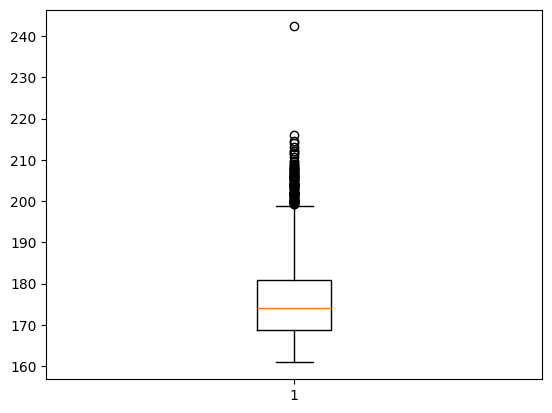

,index,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,5,80,235893,0.008950,0.316,0.9450,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
1,134,69,245960,0.235000,0.435,0.9200,0.000353,4,0.5520,-1.357,0,0.2010,188.899,4,0.450
2,154,72,193213,0.038300,0.426,0.5840,0.000000,1,0.1880,-5.293,1,0.2960,193.437,4,0.272
3,210,11,277600,0.030600,0.566,0.9110,0.024700,4,0.0574,-9.458,0,0.0791,193.538,4,0.638
4,279,52,150906,0.002060,0.252,0.5070,0.000570,2,0.3250,-13.337,1,0.0442,196.494,4,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,18494,67,146906,0.000881,0.805,0.7100,0.000026,1,0.3580,-6.642,1,0.3090,190.044,4,0.147
259,18512,48,227813,0.011500,0.765,0.7710,0.002370,7,0.6060,-6.990,1,0.3470,194.072,4,0.394
260,18629,24,201800,0.028500,0.307,0.7910,0.000804,7,0.3950,-5.408,1,0.1190,193.356,4,0.141
261,18724,53,242178,0.187000,0.319,0.7510,0.004120,10,0.1090,-3.720,1,0.1670,192.028,4,0.446


In [ ]:
# Outliers dos outliers - SUPERIOR
q1 = outliers_tempo_sup['tempo'].quantile(0.25)
q3 = outliers_tempo_sup['tempo'].quantile(0.75)
iqr = q3-q1

limite_superior_tempo_recal = q1 + 1.5 * iqr

plt.boxplot(outliers_tempo_sup['tempo'])
plt.show()

outliers_tempo_sup2 = outliers_tempo_sup[(outliers_tempo_sup['tempo'] > limite_superior_tempo_recal)] #neste caso vamos focar apenas nos outliers superiores
outliers_tempo_sup2.reset_index()

{'whiskers': [<matplotlib.lines.Line2D at 0x23f272f4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x23f272f66d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f272f44d0>],
 'medians': [<matplotlib.lines.Line2D at 0x23f272f7b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f272fc5d0>],
 'means': []}

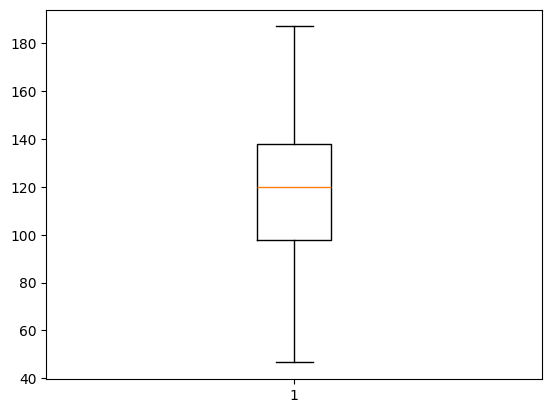

In [ ]:
# filtrar df original com o limite superior recalculado e o limite inferior inicial
df_new5 = df[(df['tempo']<limite_superior_tempo_recal) & (df['tempo']>limite_inferior_tempo)]
plt.boxplot(df_new5['tempo'])

#### Unindo os dfs novos que foram feitos

In [ ]:
df_new = df[
    (df['song_duration_ms'] > limite_inferior_songduration) & (df['song_duration_ms'] < limite_superior_songduration_recal) &  # song duration
    (df['loudness'] > limite_inferior_loudness_recal) &  # loudness
    (df['danceability'] > limite_inferior_danceability) &  # danceability
    (df['speechiness'] < limite_superior_speechiness_recal) &  # speechiness
    (df['tempo'] > limite_inferior_tempo) & (df['tempo'] < limite_superior_tempo_recal)  # tempo
]

print("Qntd de linhas df original: ", df.shape[0])
print("Qntd de linhas atual (df limpo): ", df_new.shape[0])

Qntd de linhas df original:  14924
Qntd de linhas atual (df limpo):  13851


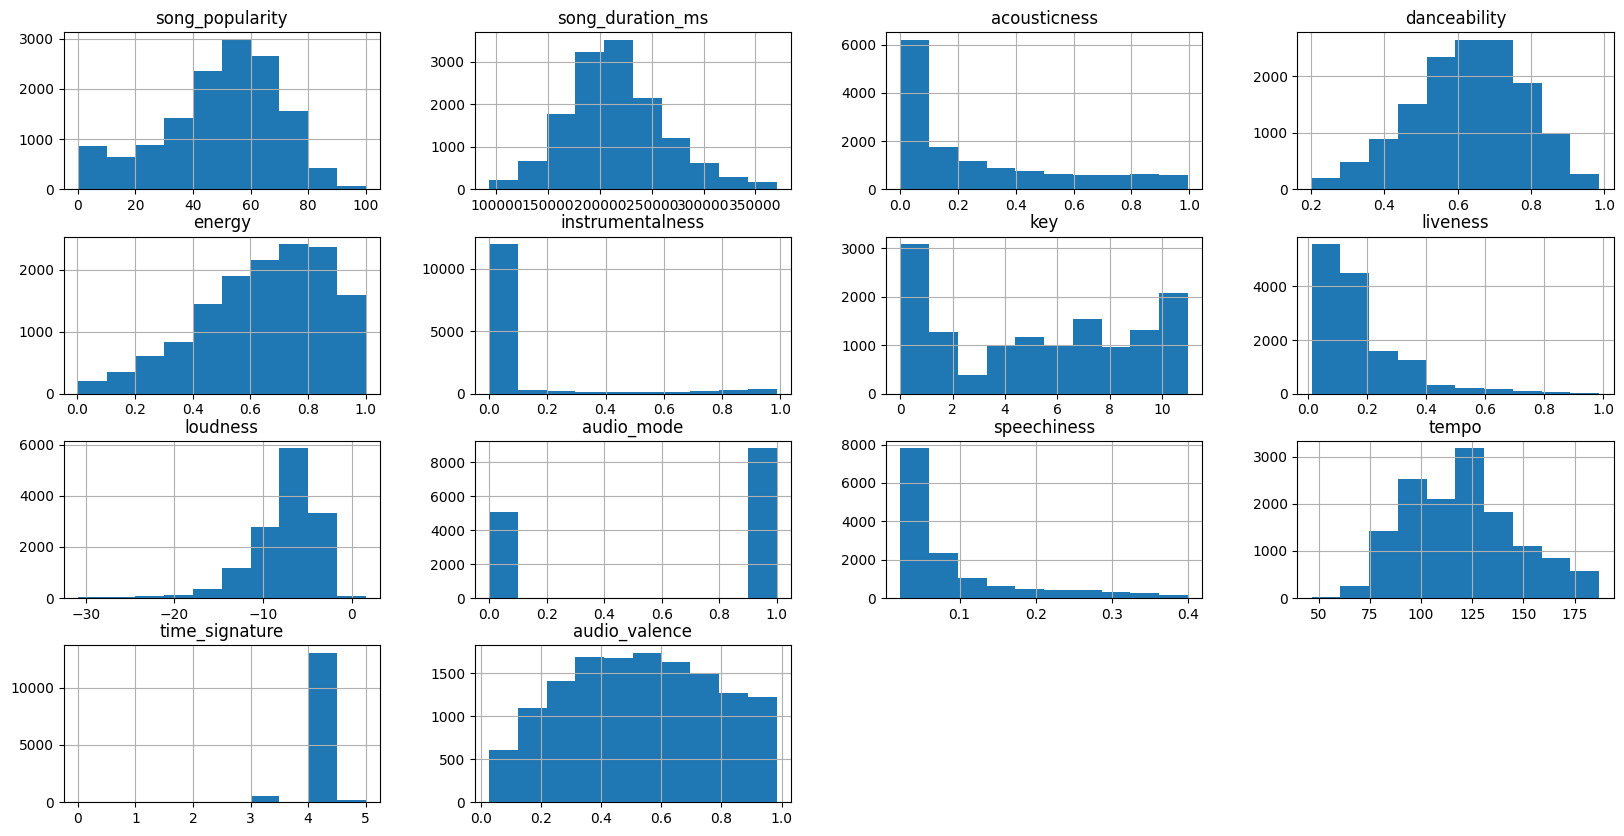

In [ ]:
histograma = df_new.hist(figsize=(20,10))

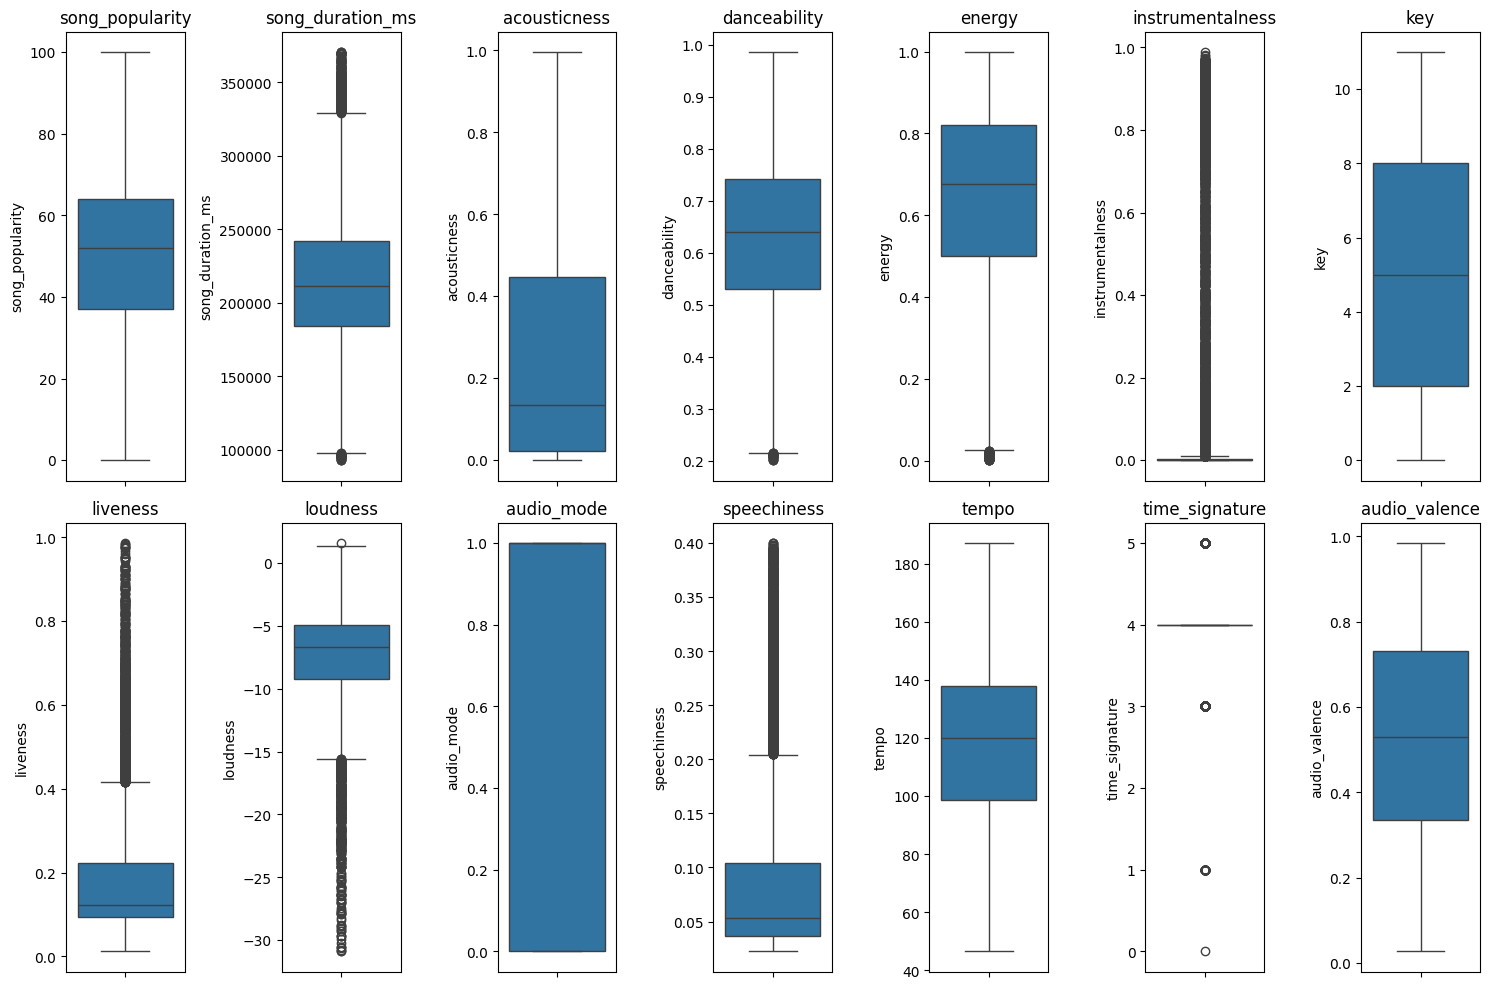

In [ ]:
# Boxplot para visualização de outliers pós tratamento

# Criar a figura e os eixos do grid
fig, axes = plt.subplots(2, 7, figsize=(15, 2*5))
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar a iteração

# Plotar cada boxplot no grid
for i, column in enumerate(df_new):
    sns.boxplot(y=df_new[column], ax=axes[i])
    axes[i].set_title(f'{column}')

# Remover eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Verificando se há colunas com alta correlação para eliminá-las

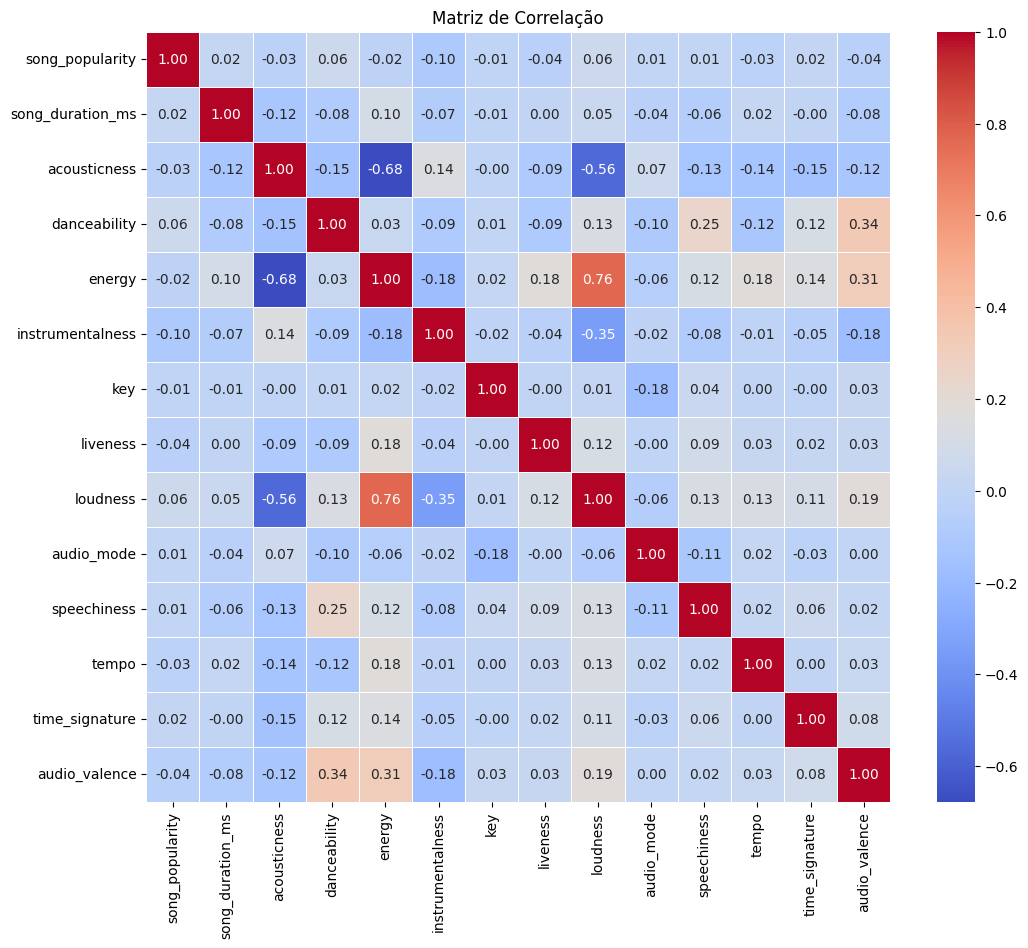

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_new.corr()

# Plotar a matriz de correlação como um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Nesse caso, poderiamos manter a coluna Energy, eliminando acousticness e loudness. A correlação entre elas é próximo a 0,7. Essa manipulação pode ser feita ao treinar o modelo para realizar um comparativo.

### Separando em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# com todas as feutures
X = df_new[['song_duration_ms', 'danceability', 'energy',
            'key', 'instrumentalness','liveness', 'acousticness',
            'loudness', 'audio_mode', 'speechiness', 'tempo',
            'time_signature', 'audio_valence']]

# retirando as colunas acousticness e loudness
# X = df_new[['song_duration_ms', 'danceability', 'energy', 'key', 'instrumentalness','liveness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]

y = df_new[['song_popularity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

# com todas as feutures
X = df_new[['song_duration_ms', 'danceability', 'energy',
            'key', 'instrumentalness','liveness', 'acousticness',
            'loudness', 'audio_mode', 'speechiness', 'tempo',
            'time_signature', 'audio_valence']]

y = df_new[['song_popularity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Normalização do dados de Treino

In [ ]:
#Será utilizado Min-Max scalling - Visto que os dados não seguem distribuição normal
from sklearn.preprocessing import MinMaxScaler

# Instanciando a função
scaler_minmax = MinMaxScaler()

# Normalizando dados de treino
for coluna in list(X.columns):
    col_name = X_train[[coluna]].copy()
    X_train[coluna] = scaler_minmax.fit_transform(col_name)


# Normalizando dados de teste
for coluna in list(X.columns):
    col_name = X_test[[coluna]].copy()
    X_test[coluna] = scaler_minmax.fit_transform(col_name)

## Modelagem

### Determinar o melhor K

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# ks que serão testados
k_values = list(range(3,255,20))

# lista para armazenar os scores
cv_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='neg_mean_squared_error') # usado para regressão
    cv_scores.append(scores.mean())
    print(f'K: {k} | Score: {scores}')

K: 3 | Score: [-509.47126955 -524.26900321 -527.09626955 -517.64214801 -555.25671881]
K: 23 | Score: [-402.6852407  -411.75892461 -413.90186681 -415.58645237 -434.07067606]
K: 43 | Score: [-400.69947435 -407.74185871 -405.68928541 -410.20747677 -429.46182906]
K: 63 | Score: [-398.47858334 -404.0340044  -404.45059341 -409.76984639 -428.26312359]
K: 83 | Score: [-399.68659023 -404.91345048 -403.77356737 -408.47751039 -428.25071427]
K: 103 | Score: [-400.14073365 -404.85351762 -404.1213645  -408.03772574 -427.63274702]
K: 123 | Score: [-401.72223439 -404.08574276 -403.47864335 -408.86640708 -427.3288181 ]
K: 143 | Score: [-402.36085647 -404.44845707 -404.52041212 -409.12116354 -427.03401976]
K: 163 | Score: [-401.31410463 -404.51291438 -404.75524829 -409.40024329 -427.76930961]
K: 183 | Score: [-401.32802814 -403.3054103  -404.2862488  -408.99579589 -428.35275596]
K: 203 | Score: [-402.12011859 -403.06960074 -403.93470515 -408.98843913 -428.24562592]
K: 223 | Score: [-402.44158846 -402.84

### Rodar Regressão com K escolhido

In [ ]:
best_k = k_values[cv_scores.index(max(cv_scores))]
best_k

103

In [ ]:
model_2 = KNeighborsRegressor(n_neighbors=best_k)
model_2.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=103)

# Avaliar Modelo

MSE:  397.9337395215293
RMSE:  19.94827660529925
MAE:  15.742797279731478
R²:  0.04248188534068298


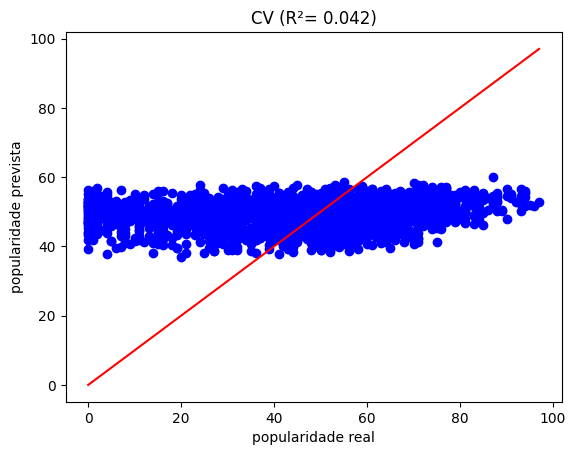

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_2 = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test,y_pred_2)

rmse_2 = np.sqrt(mean_squared_error(y_test,y_pred_2))

mae_2 = mean_absolute_error(y_test,y_pred_2)

r2 = r2_score(y_test, y_pred_2)

print("MSE: ",mse_2)
print("RMSE: ",rmse_2)
print("MAE: ",mae_2)
print("R²: ",r2)

plt.scatter(y_test, y_pred_2, color ='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color = 'red')
plt.xlabel('popularidade real')
plt.ylabel('popularidade prevista')
plt.title(f'CV (R²={r2: .3f})')
plt.show()

Este mesmo dataset foi modelado com vários regressores e apresentado no link: https://www.kaggle.com/code/bunny11/popular-song-prediction/notebook

As etapas de pré-processamento se diferem das apresentadas neste notebook, mas a título de comparação segue:

![image-2.png](attachment:image-2.png)